# Predict Food Delivery Time

### 문제설명
이번 과제를 통해 여러분은 음식배달 서비스(배민, 쿠팡이츠 등)를 위한 예측모델을 만들게 될 것입니다! 이 모델이 예측하는 값은 “음식배달에 걸리는 시간"입니다. 배달시간을 정확하게 예측하는 것은 사용자의 경험에 많은 영향을 미치게 됩니다.\
예측된 배달시간보다 실제 배달시간이 더 걸린 경우(under-prediction)가 반대의 경우(over-prediction)보다 두 배로 사용자의 경험에 안 좋은 영향을 준다고 알려져 있습니다.\
가능한 실제 배달시간과 가까운 값을 예측하되 동시에 under-prediction을 최소화하는 것이 좋은 예측모델입니다.

### 학습/테스트 데이터
파일 “predict_delivery_time.csv”는 다음과 같은 속성들을 가지고 있습니다.

- Restaurant, Location, Cuisines, AverageCost, MinimumOrder, Rating, Votes, Reviews 속성들을 모델의 입력속성으로 사용하세요. 모델의 학습목표는 DeliveryTime입니다.
- 이 데이터에서 랜덤하게 20%를 추출해서 테스트 데이터로 사용하고 나머지는 학습데이터로 사용하세요.

### 제출할 결과물
- 간단한 요약문
- 데이터 전처리와 속성 생성에 대한 간단한 설명
- 학습을 위해서 어떤 모델을 사용했는지 그리고 어떠한 손실함수를 사용했는지를 간단히 설명
- 테스트 데이터에 대한 평가지표들 (아래 두가지를 반드시 포함할 것)
- Mean Absolute Error (MAE)
- Under-prediction의 비율 (under-prediction 개수 / 테스트 데이터의 샘플수)
- 모델 학습에 사용한 Jupyter notebook 파일

## 1. 큰 그림을 봅니다 (look at the big picture).

이번 과제를 통해 여러분은 음식배달 서비스(배민, 쿠팡이츠 등)를 위한 예측모델을 만들게 될 것입니다! \
이 모델이 예측하는 값은 “음식배달에 걸리는 시간"입니다. 배달시간을 정확하게 예측하는 것은 사용자의 경험에 많은 영향을 미치게 됩니다.

예측된 배달시간보다 실제 배달시간이 더 걸린 경우(under-prediction)가 반대의 경우(over-prediction)보다 두 배로 사용자의 경험에 안 좋은 영향을 준다고 알려져 있습니다.\
가능한 실제 배달시간과 가까운 값을 예측하되 동시에 under-prediction을 최소화하는 것이 좋은 예측모델입니다.

### 풀어야할 문제 : 음식배달 데이터를 활용해 음식 배달 시간 예측 모델을 만드는 것

실제 배달시간과 가까운 값을 예측: 지도학습, 회귀모델
동시에 under-prediction을 최소화하는 것이 좋은 예측모델 -> 이건 어떻게 풀 수 있을까?

### 성능측정 지표
Mean Absolute Error (MAE)
Under-prediction의 비율 (under-prediction 개수 / 테스트 데이터의 샘플수)

## 2. 데이터를 구합니다 (get the data).

In [1]:
# import common libraries
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
food = pd.read_csv('predict_delivery_time.csv')

### 데이터 톺아보기

In [3]:
food.head()

,Restaurant,Location,Cuisines,AverageCost,MinimumOrder,Rating,Votes,Reviews,DeliveryTime
0,ID6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12.0,4.0,30
1,ID2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11.0,4.0,30
2,ID1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99.0,30.0,65
3,ID5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176.0,95.0,30
4,ID6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521.0,235.0,65


### 여기서 다루는 변수는 다음과 같다.

- Restaurant: A unique ID that represents a restaurant.
- Location: The location of the restaurant.
- Cuisines: The cuisines offered by the restaurant.
- Average_Cost: The average cost for one person/order.
- Minimum_Order: The minimum order amount.
- Rating: Customer rating for the restaurant.
- Votes: The total number of customer votes for the restaurant.
- Reviews: The number of customer reviews for the restaurant.
- Delivery_Time: The order delivery time of the restaurant. (Target Classes)

In [4]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Restaurant    11094 non-null  object 
 1   Location      11094 non-null  object 
 2   Cuisines      11094 non-null  object 
 3   AverageCost   11094 non-null  object 
 4   MinimumOrder  11094 non-null  int64  
 5   Rating        9903 non-null   object 
 6   Votes         9020 non-null   float64
 7   Reviews       8782 non-null   float64
 8   DeliveryTime  11094 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 780.2+ KB


In [5]:
food.isnull().sum()

Restaurant         0
Location           0
Cuisines           0
AverageCost        0
MinimumOrder       0
Rating          1191
Votes           2074
Reviews         2312
DeliveryTime       0
dtype: int64

In [6]:
food.describe()

,MinimumOrder,Votes,Reviews,DeliveryTime
count,11094.000000,9020.000000,8782.000000,11094.000000
mean,53.344511,244.544457,123.247893,37.056066
std,18.551245,555.094733,321.025216,12.447496
min,0.000000,3.000000,1.000000,10.000000
25%,50.000000,19.000000,7.000000,30.000000
50%,50.000000,63.000000,26.000000,30.000000
75%,50.000000,216.000000,91.000000,45.000000
max,500.000000,9054.000000,6504.000000,120.000000


In [7]:
food.describe(include='O')

,Restaurant,Location,Cuisines,AverageCost,Rating
count,11094,11094,11094,11094,9903
unique,7480,35,2179,26,32
top,ID7184,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,200,3.7
freq,22,947,850,3241,869


- 간략하게 훑어보고 알 수 있는 사실
1. target label: DeliveryTime 연속변수이며, 최소 10에서 120까지 분포되어 있어 분 단위일 것으로 예상됩니다.
2. AverageCost, Rating 은 numerical 같이 생겼는데 object라고 뜹니다. 어떤 value들이 들어가 있는지 잘 봐야할 것 같습니다.
3. Rating, Votes, Reviews에는 결측치가 상당수 있습니다.
4. Reviews의 분포와 feature에 대한 설명을 보니 점수가 아니라 리뷰의 갯수인 것 같습니다. negative/positive 내용이 구분되어있지 않습니다.
5. Votes 역시 feature의 설명을 보니 긍정적인 의미의 vote의 갯수인지, 그냥 투표를 한 갯수를 의미하는 건지 잘 모르겠네요.
6. object인 변수도 간단하게 살펴보았는데, unique 값이 26개인 feature 부터 7480개인 feature까지 다양합니다. AverageCost와 Rating은 빈출값만 봐도 numerical 한 데이터 같은데 왜 object인지 살펴볼 필요가 있습니다.

## 3. 데이터로부터 통찰을 얻기 위해 탐색하고 시각화합니다 (discover and visualize the data to gain insights).

### 3-1. 데이터 탐색

각 feature들을 범주형 / 연속형으로 나누어 특성에 맞게 살펴보겠습니다.

In [8]:
food.columns

Index(['Restaurant', 'Location', 'Cuisines', 'AverageCost', 'MinimumOrder',
       'Rating', 'Votes', 'Reviews', 'DeliveryTime'],
      dtype='object')

In [9]:
num_col = []
cat_col = []
for i in food.columns:
    if food[i].dtypes == 'int64' or food[i].dtypes == 'float64':
        num_col.append(i)
    else: cat_col.append(i)

In [10]:
print("numerical columns:", num_col)
print("categorical columns:", cat_col)

numerical columns: ['MinimumOrder', 'Votes', 'Reviews', 'DeliveryTime']
categorical columns: ['Restaurant', 'Location', 'Cuisines', 'AverageCost', 'Rating']


범주형 데이터에 어떤 values들이 들어있는지 보겠습니다.

In [11]:
food['Restaurant'].value_counts()

ID7184    22
ID7295    20
ID4625    20
ID5538    19
ID5321    19
          ..
ID5287     1
ID90       1
ID3190     1
ID4325     1
ID3740     1
Name: Restaurant, Length: 7480, dtype: int64

무려 7480개의 레스토랑이 있습니다. 그 중에 빈도가 20회가 넘는 레스토랑들도 있는 반면, 1회인 레스토랑도 많네요.

In [12]:
food['Location'].value_counts()

Mico Layout, Stage 2, BTM Layout,Bangalore          947
DBlock, Sector 63, Noida                            806
Sector 1, Noida                                     791
FTI College, Law College Road, Pune                 584
Delhi UniversityGTB Nagar                           545
Laxman Vihar Industrial Area, Sector 3A, Gurgoan    493
Sector 14, Noida                                    489
Delhi Administration Flats, Timarpur                472
Mumbai Central                                      459
Rmz Centennial, I Gate, Whitefield                  457
Delhi High Court, India Gate                        411
MG Road, Pune                                       402
Nathan Road, Mangaldas Road, Pune                   372
Sandhurst Road, Mumbai CST Area                     370
Sector 3, Marathalli                                366
Majestic                                            334
Delhi Cantt.                                        326
Yerawada, Pune, Maharashtra                     

location feature는 의외로 values의 종류가 많지는 않습니다. 구글지도에서 몇 군데를 검색해본 결과 대부분은 인도 각 도시의 distirct를 가리키는 주소였습니다.

In [13]:
food['Cuisines'].value_counts()

North Indian                                                850
North Indian, Chinese                                       614
Fast Food                                                   434
South Indian                                                270
Chinese                                                     245
                                                           ... 
South Indian, North Indian, Chinese, Desserts, Beverages      1
Continental, Fast Food, North Indian, Chinese                 1
Chinese, Seafood, Thai, North Indian                          1
Lebanese, Kebab                                               1
Korean, Momos, Asian                                          1
Name: Cuisines, Length: 2179, dtype: int64

In [14]:
food['AverageCost'].value_counts()

200      3241
100      2557
150      2462
250       881
300       537
350       283
400       282
50        265
600       154
500       101
450        63
550        60
650        55
800        44
750        38
900        15
700        15
1,000      12
850        12
1,200       8
950         4
1,100       1
for         1
2,050       1
1,150       1
1,400       1
Name: AverageCost, dtype: int64

'for' 하나 때문에 numerical feature가 안된 것 같다.

In [15]:
food['Rating'].unique()

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', nan, '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', 'NEW', '2.9', '4.6',
       '4.3', '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5',
       'Opening Soon', '2.2', '4.9', '2.3', '2.1', 'Temporarily Closed'],
      dtype=object)

'New', Opening Soon', 'Temporarily Closed' 같은 변수들은 사실 Rating이 없다고 봐야할 것 같다.

연속형 데이터들의 분포를 보겠습니다.

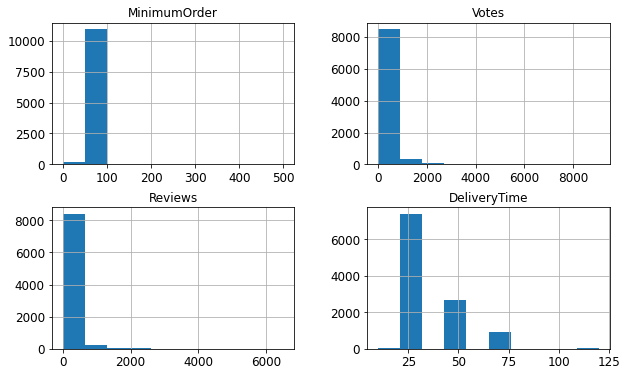

In [16]:
food.hist(figsize=(10,6))
plt.show()

고르게 분포되어있지 않은 모습입니다.

### 3-2. 데이터 cleaning

cleaning을 거칠 features 들

1. AverageCost, Rating : 숫자 타입이 아닌 value들 처리하고, 타입 변환
2. Location & Cuisines : 범주형 변수. encoding 전에 처리해야할 부분이 있는지 확인, 처리

1. AverageCost : 특이값을 처리하고, 타입 변환

In [17]:
# 아까 찾았던 이상한 value row를 최빈값으로 대체
food["AverageCost"][food['AverageCost'] == 'for'] = 200

<ipython-input-17-5ff5ac6342f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food["AverageCost"][food['AverageCost'] == 'for'] = 200


In [18]:
food[food['AverageCost'] == 'for']

,Restaurant,Location,Cuisines,AverageCost,MinimumOrder,Rating,Votes,Reviews,DeliveryTime


In [19]:
food['AverageCost'].dtypes

dtype('O')

In [20]:
food['AverageCost'].unique()

array(['200', '100', '150', '250', '650', '350', '800', '50', '400',
       '600', '300', '750', '450', '550', '1,000', '500', '900', '1,200',
       '950', '850', '700', '1,150', 200, '1,100', '1,400', '2,050'],
      dtype=object)

쉼표때문에 숫자로 인식이 안되는 것 같다. 정규표형식으로 빼주려 한다.

In [21]:
import re

food['AverageCost'] = food['AverageCost'].apply(lambda x: int(re.sub("[^0-9]", "", str(x))))

food['AverageCost'].dtypes

dtype('int64')

2. Rating : 숫자 타입이 아닌 value들 처리 후 타입 변환

In [22]:
food['Rating'].mode()

0    3.7
dtype: object

In [23]:
rating_dropna_sampling = food[food.isnull().any(axis=1)]
rating_dropna_sampling 

,Restaurant,Location,Cuisines,AverageCost,MinimumOrder,Rating,Votes,Reviews,DeliveryTime
12,ID1156,"Sector 1, Noida","Burger, Fast Food, Desserts, Beverages",150,50,NaN,NaN,NaN,30
16,ID2141,"Sector 1, Noida",Italian,100,50,NaN,NaN,NaN,30
18,ID5262,Pune University,"Kerala, Bihari",150,50,NaN,NaN,NaN,30
25,ID4944,"Mico Layout, Stage 2, BTM Layout,Bangalore","Desserts, Ice Cream",100,50,NaN,NaN,NaN,45
47,ID2809,"Mico Layout, Stage 2, BTM Layout,Bangalore",Chinese,200,50,NEW,NaN,NaN,30
...,...,...,...,...,...,...,...,...,...
11082,ID1434,"Laxman Vihar Industrial Area, Sector 3A, Gurgoan","North Indian, Chinese, Mughlai",200,50,NaN,NaN,NaN,120
11084,ID968,"Delhi Administration Flats, Timarpur","North Indian, Asian",200,50,NEW,NaN,NaN,30
11085,ID2394,Majestic,Street Food,100,50,NaN,NaN,NaN,30
11086,ID2050,"FTI College, Law College Road, Pune","North Indian, Fast Food",300,50,NaN,NaN,NaN,30


In [24]:
#Rating : 일단 text로 되어 있는 애들은 새로 열었거나 일시적으로 문을 닫은 상태라는 의미이니, nan으로 만들어줌
food['Rating']=pd.to_numeric(food['Rating'].apply(lambda x : np.nan if x in ['Temporarily Closed','Opening Soon','-','NEW'] else x))

In [25]:
food['Rating'].dtypes

dtype('float64')

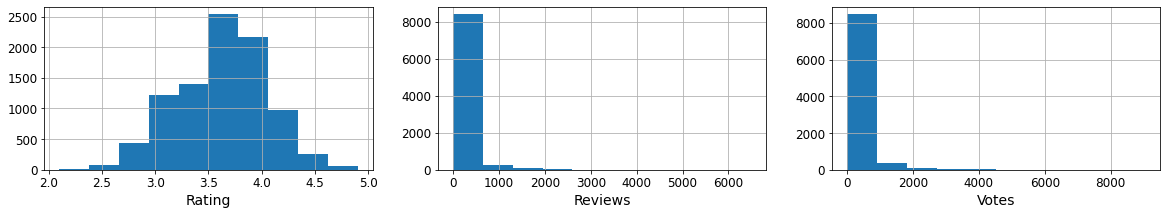

In [26]:
plt.figure(figsize=(20, 3))

ax1 = plt.subplot(131)
food['Rating'].hist()
plt.xlabel('Rating')

ax2 = plt.subplot(132)
food['Reviews'].hist()
plt.xlabel('Reviews')

ax3 = plt.subplot(133)
food['Votes'].hist()
plt.xlabel('Votes')

plt.show()

Rating은 얼추 정규분포 비슷한 형태
Votes와 Reviews는 표나 리뷰를 작성한 갯수라서 대부분은 0에 붙어 있는 작은 값이지만 엄청 큰 outliers들이 있는 분포다.
-> scaling 또는 categorization 필요

2. Location & Cuisines : 범주형 변수. encoding 전에 처리해야할 부분이 있는지 확인, 처리

Location과 Cuisine variable의 가장 큰 특징은 그냥 범주형 변수가 아니라, 한 column안에서 , 를 기준으로 여러 개의 value가 들어가 있다는 점이다.

크게는 8개의 value가 들어가 있다. 이걸 어떻게 처리할까?
1. one hot encoding
2. label encoding
3. multilabel binarizer
4. text count vectorizer

*참고*
https://stackoverflow.com/questions/50473381/scikit-learns-labelbinarizer-vs-onehotencoder

In [27]:
'''
1. one hot encoding
dummied = pd.get_dummies(food['Location'])
dummied
'''

"\n1. one hot encoding\ndummied = pd.get_dummies(food['Location'])\ndummied\n"

In [28]:
# countvectorizer 써보자
from sklearn.feature_extraction.text import CountVectorizer



In [29]:
food['Cuisines']=food['Cuisines'].str.lower()

In [30]:
food['Cuisines'].value_counts()

north indian                                                 850
north indian, chinese                                        614
fast food                                                    434
south indian                                                 270
chinese                                                      245
                                                            ... 
south indian, fast food, beverages                             1
healthy food, salad, north indian, continental, beverages      1
chinese, fast food, beverages, north indian                    1
north indian, italian, continental, finger food                1
fast food, raw meats                                           1
Name: Cuisines, Length: 2179, dtype: int64

In [31]:
count_vect = CountVectorizer()
cuisines_vector = count_vect.fit_transform(food['Cuisines'])
cuisines_vector.shape

(11094, 107)

In [32]:
cuisines_vector.toarray()

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
cus_df = pd.DataFrame(cuisines_vector.toarray())
cus_df

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
len(food['Location'].unique())

35

그래도 location은 갯수가 많지 않으니 one-hot encoding으로

In [35]:
dummied = pd.get_dummies(food['Location'])
dummied

,"BTM Layout 1, Electronic City","Babarpur, New Delhi, Delhi","Chandni Chowk, Kolkata","Chatta Bazaar, Malakpet, Hyderabad","DBlock, Sector 63, Noida","Delhi Administration Flats, Timarpur",Delhi Cantt.,"Delhi High Court, India Gate",Delhi UniversityGTB Nagar,"Dockyard Road, Mumbai CST Area",...,"Raja Bazar, Kolkata","Rmz Centennial, I Gate, Whitefield","Sandhurst Road, Mumbai CST Area","Sector 1, Noida","Sector 14, Noida","Sector 3, Marathalli","Sector 63A,Gurgaon","Tejas Nagar Colony, Wadala West, Mumbai","Tiretti, Kolkata","Yerawada, Pune, Maharashtra"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11089,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [36]:
loc_df = pd.DataFrame(dummied)
loc_df

,"BTM Layout 1, Electronic City","Babarpur, New Delhi, Delhi","Chandni Chowk, Kolkata","Chatta Bazaar, Malakpet, Hyderabad","DBlock, Sector 63, Noida","Delhi Administration Flats, Timarpur",Delhi Cantt.,"Delhi High Court, India Gate",Delhi UniversityGTB Nagar,"Dockyard Road, Mumbai CST Area",...,"Raja Bazar, Kolkata","Rmz Centennial, I Gate, Whitefield","Sandhurst Road, Mumbai CST Area","Sector 1, Noida","Sector 14, Noida","Sector 3, Marathalli","Sector 63A,Gurgaon","Tejas Nagar Colony, Wadala West, Mumbai","Tiretti, Kolkata","Yerawada, Pune, Maharashtra"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11089,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [37]:
'''
from sklearn.preprocessing import MultiLabelBinarizer

food['Cuisines']

mb_cuisines = MultiLabelBinarizer()

c_values = [_c.split(', ') for _c in food.Cuisines.values]
c_values

y_df = mb_cuisines.fit_transform(c_values)

y_df = pd.DataFrame(y_df)
y_df.head()
'''

"\nfrom sklearn.preprocessing import MultiLabelBinarizer\n\nfood['Cuisines']\n\nmb_cuisines = MultiLabelBinarizer()\n\nc_values = [_c.split(', ') for _c in food.Cuisines.values]\nc_values\n\ny_df = mb_cuisines.fit_transform(c_values)\n\ny_df = pd.DataFrame(y_df)\ny_df.head()\n"

### 3-3. 결측치 처리

1. 연속형 변수들의 결측치 처리

In [38]:
food.isnull().sum()

Restaurant         0
Location           0
Cuisines           0
AverageCost        0
MinimumOrder       0
Rating          1963
Votes           2074
Reviews         2312
DeliveryTime       0
dtype: int64

결측치가 상당히 많아서 버리긴 아깝다.

1. mean
2. median
3. mode
4. 특징에 따라 가까운 값 넣기


-> 일단은 median 값으로 결측치 처리해보기


In [39]:
def fillnawithmedian(data, var):
    data[f"{var}_filled"] = data[var].fillna(data[var].median())
    return data[f"{var}_filled"]

In [40]:
fillnawithmedian(food, 'Rating')
fillnawithmedian(food, 'Votes')
fillnawithmedian(food, 'Reviews')

0          4.0
1          4.0
2         30.0
3         95.0
4        235.0
         ...  
11089    189.0
11090     16.0
11091     18.0
11092      9.0
11093     26.0
Name: Reviews_filled, Length: 11094, dtype: float64

In [41]:
food.isnull().sum()

Restaurant           0
Location             0
Cuisines             0
AverageCost          0
MinimumOrder         0
Rating            1963
Votes             2074
Reviews           2312
DeliveryTime         0
Rating_filled        0
Votes_filled         0
Reviews_filled       0
dtype: int64

Restaurant 변수는 모두 고유값이라면, 그냥 index로 보고 탈락시킬 텐데, restaurant이 중복 등장한 경우도 있습니다. 고유값이 7000개가 넘다보니 역시 label encoding을 하도록 하겠습니다.

In [42]:
unique_restaurant = list(set(list(food['Restaurant'])))

In [43]:
len(unique_restaurant)

7480

이제 모델링할 정제된 fianl dataframe을 만들기 위해 기존 df를 copy해서 작업하겠습니다.

In [44]:
final = food.copy()

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le_restaurant = LabelEncoder().fit(unique_restaurant)
final['Restaurant'] = le_restaurant.transform(final['Restaurant'])

In [47]:
final

,Restaurant,Location,Cuisines,AverageCost,MinimumOrder,Rating,Votes,Reviews,DeliveryTime,Rating_filled,Votes_filled,Reviews_filled
0,5086,"FTI College, Law College Road, Pune","fast food, rolls, burger, salad, wraps",200,50,3.5,12.0,4.0,30,3.5,12.0,4.0
1,1785,"Sector 3, Marathalli","ice cream, desserts",100,50,3.5,11.0,4.0,30,3.5,11.0,4.0
2,571,Mumbai Central,"italian, street food, fast food",150,50,3.6,99.0,30.0,65,3.6,99.0,30.0
3,4708,"Sector 1, Noida","mughlai, north indian, chinese",250,99,3.7,176.0,95.0,30,3.7,176.0,95.0
4,4896,"Rmz Centennial, I Gate, Whitefield","cafe, beverages",200,99,3.2,521.0,235.0,65,3.2,521.0,235.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11089,6772,"BTM Layout 1, Electronic City","tibetan, chinese, continental, momos",250,50,4.2,326.0,189.0,30,4.2,326.0,189.0
11090,3461,"Sector 14, Noida",fast food,100,50,3.6,36.0,16.0,30,3.6,36.0,16.0
11091,2273,Majestic,"south indian, chinese, north indian",100,50,3.5,45.0,18.0,30,3.5,45.0,18.0
11092,2970,"Sector 3, Marathalli",north indian,100,50,3.1,24.0,9.0,30,3.1,24.0,9.0


In [48]:
final.drop(["Location","Cuisines",'Rating','Votes','Reviews'],axis=1,inplace=True)

### 3-4. 데이터 시각화

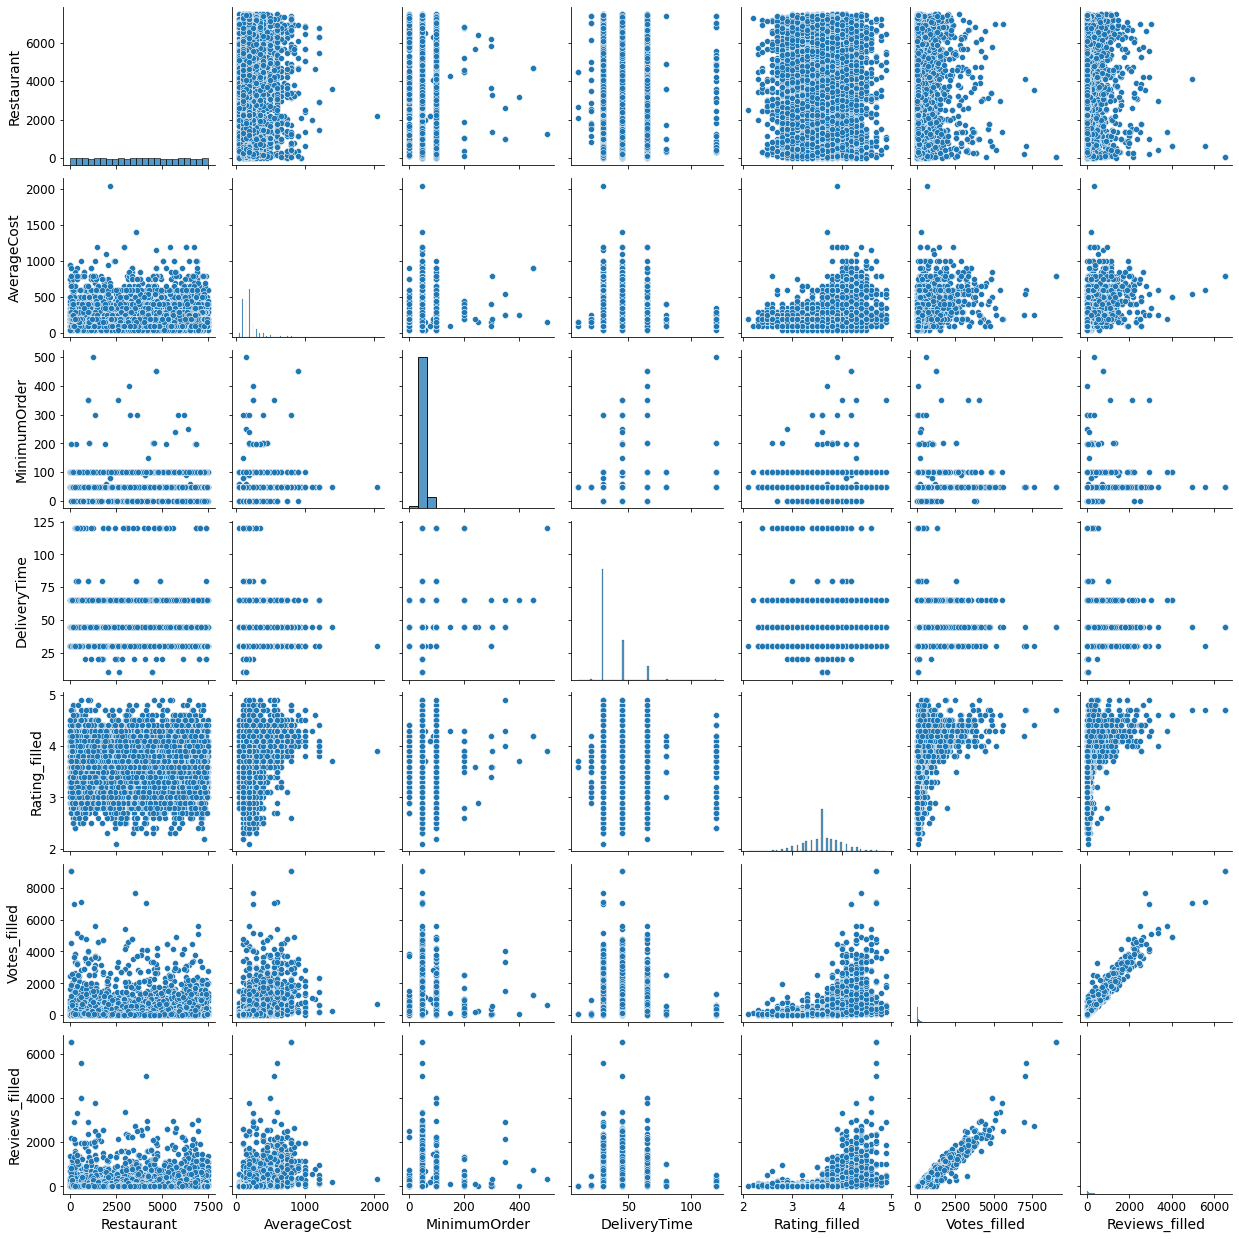

In [49]:
sns.pairplot(final)
plt.show()

votes와 review사이에 상관관계가 느껴집니다.
그냥 corr_chart으로는 delivery time와 상관관계가 느껴지는 변수는 잘 보이지 않네요.

### 3-5. 데이터 스케일링

연속형 변수들 중 rating 말고는 정규분포 형태가 아니라 왼쪽으로 크게 skew된 분포를 보이고 있습니다. 그리고 값의 단위가 많이 다르기 때문에 이것도 스케일링이 필요해 보입니다.

<AxesSubplot:>

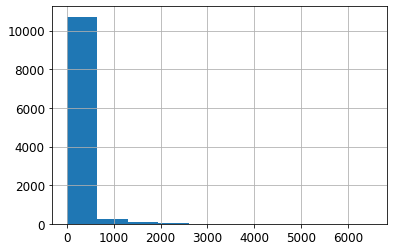

In [50]:
final["Reviews_filled"].hist()

In [51]:
final["log_Reviews"] = final["Reviews_filled"].map(lambda x: np.log(x, where=(x!=0)))

<AxesSubplot:>

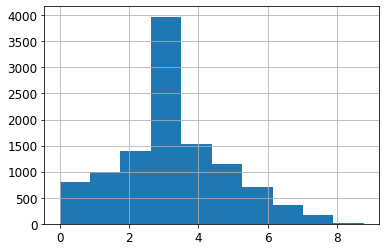

In [52]:
final["log_Reviews"].hist()

In [53]:
final['MinimumOrder'].value_counts()

50     10118
99       779
0        158
200        8
199        8
299        3
350        3
59         3
90         2
450        2
300        2
79         2
89         1
250        1
400        1
240        1
500        1
150        1
Name: MinimumOrder, dtype: int64

In [54]:
final["log_MinimumOrder"] = final["MinimumOrder"].map(lambda x: np.log(x, where=(x!=0)))
final["log_Votes"] = final["Votes_filled"].map(lambda x: np.log(x, where=(x!=0)))

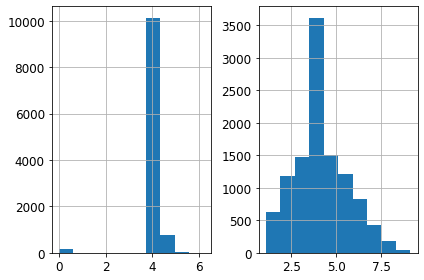

In [55]:
ax1 = plt.subplot(121)
final["log_MinimumOrder"].hist()
ax2 = plt.subplot(122)
final["log_Votes"].hist()
plt.tight_layout()
plt.show()

MinimumOrder는 로그한 그림이 별로 예쁘지 않네요.

In [56]:
#standard scaler
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

In [57]:
final['mm_log_Reviews'] = mm_scaler.fit_transform(final['log_Reviews'] .values.reshape(-1,1))
final['mm_log_MinimumOrder'] = mm_scaler.fit_transform(final['log_MinimumOrder'] .values.reshape(-1,1))
final['mm_log_Votes'] = mm_scaler.fit_transform(final['log_Votes'] .values.reshape(-1,1))

In [58]:
final['mm_Rating'] = mm_scaler.fit_transform(final['Rating_filled'] .values.reshape(-1,1))
final['mm_AverageCost'] = mm_scaler.fit_transform(final['AverageCost'] .values.reshape(-1,1))

In [59]:
final[['mm_log_Reviews','mm_log_MinimumOrder', 'mm_log_Votes', 'mm_Rating','mm_AverageCost']].describe()

,mm_log_Reviews,mm_log_MinimumOrder,mm_log_Votes,mm_Rating,mm_AverageCost
count,11094.000000,11094.000000,11094.000000,11094.000000,11094.000000
mean,0.375173,0.629012,0.386478,0.539671,0.076354
std,0.178497,0.081797,0.181391,0.134261,0.064917
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.273103,0.629488,0.269519,0.464286,0.025000
50%,0.371074,0.629488,0.379979,0.535714,0.075000
75%,0.471874,0.629488,0.493942,0.607143,0.075000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
final.head()

,Restaurant,AverageCost,MinimumOrder,DeliveryTime,Rating_filled,Votes_filled,Reviews_filled,log_Reviews,log_MinimumOrder,log_Votes,mm_log_Reviews,mm_log_MinimumOrder,mm_log_Votes,mm_Rating,mm_AverageCost
0,5086,200,50,30,3.5,12.0,4.0,1.386294,3.912023,2.484907,0.157889,0.629488,0.173020,0.500000,0.075
1,1785,100,50,30,3.5,11.0,4.0,1.386294,3.912023,2.397895,0.157889,0.629488,0.162160,0.500000,0.025
2,571,150,50,65,3.6,99.0,30.0,3.401197,3.912023,4.595120,0.387372,0.629488,0.436390,0.535714,0.050
3,4708,250,99,30,3.7,176.0,95.0,4.553877,4.595120,5.170484,0.518655,0.739406,0.508199,0.571429,0.100
4,4896,200,99,65,3.2,521.0,235.0,5.459586,4.595120,6.255750,0.621808,0.739406,0.643649,0.392857,0.075


In [107]:
final = final[['DeliveryTime', 'mm_log_Reviews','mm_log_MinimumOrder', 'mm_log_Votes', 'mm_Rating','mm_AverageCost']]

In [108]:
final.head()

,DeliveryTime,mm_log_Reviews,mm_log_MinimumOrder,mm_log_Votes,mm_Rating,mm_AverageCost
0,30,0.157889,0.629488,0.173020,0.500000,0.075
1,30,0.157889,0.629488,0.162160,0.500000,0.025
2,65,0.387372,0.629488,0.436390,0.535714,0.050
3,30,0.518655,0.739406,0.508199,0.571429,0.100
4,65,0.621808,0.739406,0.643649,0.392857,0.075


## 4. 머신러닝 알고리즘을 위해 데이터를 준비합니다 (prepare the data for Machine Learning algorithms).

### 4-1. 변수 만들기

In [109]:
final.shape

(11094, 6)

In [110]:
final.isnull().sum()

DeliveryTime           0
mm_log_Reviews         0
mm_log_MinimumOrder    0
mm_log_Votes           0
mm_Rating              0
mm_AverageCost         0
dtype: int64

In [111]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DeliveryTime         11094 non-null  int64  
 1   mm_log_Reviews       11094 non-null  float64
 2   mm_log_MinimumOrder  11094 non-null  float64
 3   mm_log_Votes         11094 non-null  float64
 4   mm_Rating            11094 non-null  float64
 5   mm_AverageCost       11094 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 520.2 KB


In [112]:
#마지막으로 인코딩한 categorical columns들을 붙입니다.

In [113]:
final = pd.concat([pd.DataFrame(loc_df), pd.DataFrame(cus_df),final],sort=False,axis = 1)

### 4-2. 트레인-테스트 분리

In [114]:
#y label 분리
y = final["DeliveryTime"].copy()
X = final.drop("DeliveryTime", axis=1) # drop labels for training set


In [115]:
#train, test 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=True, random_state=42)

## 5. 모델을 선택하고 훈련시킵니다 (select a model and train it).

### 5-1. linear regression

In [116]:
from sklearn.linear_model import LinearRegression
#인스턴스, fit
m_lr = LinearRegression()
m_lr.fit(X_train, y_train)

LinearRegression()

In [117]:
#predict
y_pred = m_lr.predict(X_test)


In [118]:

from sklearn.metrics import mean_absolute_error as mae, r2_score as r2


In [119]:

# 4. 평가 MAE와 R^2

print('R^2: ', r2(y_test,y_pred))
print('MAE: ',(mae(y_test,y_pred)))

R^2:  -6.546292004646012e+20
MAE:  9214932049.394396


In [120]:
### under-prediction vs. over-prediction
y_pred

array([41.30859375, 36.67578125, 44.91015625, ..., 28.23046875,
       40.62890625, 30.5234375 ])

In [121]:
y_test

1891      65
9166      45
5909      65
8144     120
883       30
        ... 
9030      30
2344      30
10961     30
1508      45
7628      45
Name: DeliveryTime, Length: 2219, dtype: int64

In [122]:
underpredic_bool = y_test-y_pred > 0
len(underpredic_bool[underpredic_bool ==True])/len(underpredic_bool)

0.3465525011266336

약 28%가 예측값보다 실제 도착 시간이 더 오래 걸린 것으로 보입니다.  
함수로 만들어 보도록 하겠습니다.

In [123]:
def underpredic_ratio (y_test, y_pred):
    underpredic_bool = y_test-y_pred > 0
    return len(underpredic_bool[underpredic_bool ==True])/len(underpredic_bool)

In [124]:
underpredic_ratio (y_test, y_pred)

0.3465525011266336

<AxesSubplot:>

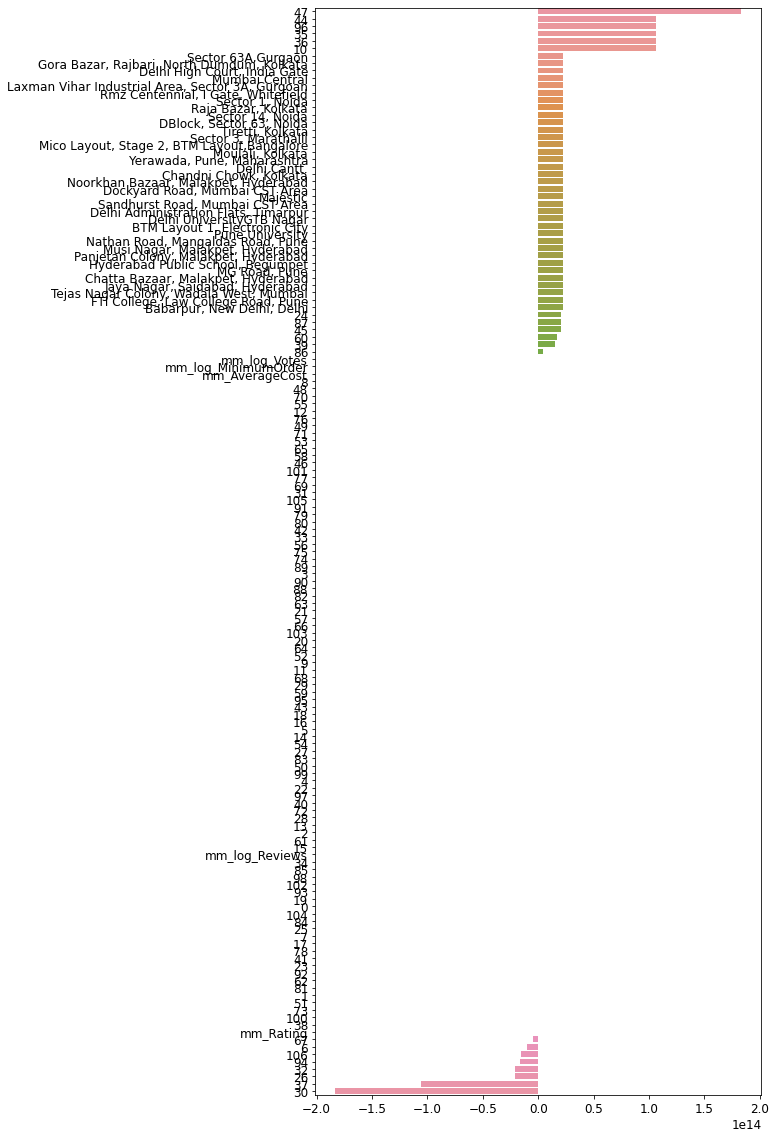

In [125]:
#예측력이 별로 좋지는 않습니다. 어떤 feature들이 설명력이 높았는지 찾아봅시다.
coef = pd.Series(m_lr.coef_, index = X_train.columns)
coef_sort = coef.sort_values(ascending=False)

plt.figure(figsize=(8, 20))
sns.barplot(x=coef_sort.values, y=coef_sort.index)

규제화 해보기

In [126]:
from sklearn.linear_model import Ridge, Lasso

In [127]:
#1. 인스턴스화
# alpha : 하이퍼 파라미터 규제의 강도
ridge_model = Ridge(alpha = 1)
# 2. 적합화
ridge_model.fit(X_train,y_train)
# 3. 예측
y_pred = ridge_model.predict(X_test)

In [128]:

# 4. 평가 MAE와 R^2
#R^2
print('ridge (alpha 1) R^2: ', r2(y_test, y_pred))

# MAE
print('ridge (alpha 1) MAE: ', mae(y_test, y_pred))

ridge (alpha 1) R^2:  0.15718270680207358
ridge (alpha 1) MAE:  7.673774544470501


In [129]:
#1. 인스턴스화
lasso_model = Lasso(alpha = 1)

# 2. 적합화(학습)
lasso_model.fit(X_train, y_train)

# 3. 예측
y_pred = lasso_model.predict(X_test)


# 4. 평가 MAE와 R^2

#R^2
print('lasso (alpha 1) R^2: ', r2(y_test, y_pred))
# MAE
print('lasso (alpha 1) MAE: ', mae(y_test, y_pred))

lasso (alpha 1) R^2:  -0.0011507414206157751
lasso (alpha 1) MAE:  9.35971564402186


ridge나 lasso 모델로 예측치 상승이 크게 늘어날 것 같지는 않습니다.

### 5-2. Decision Tree

In [130]:
from sklearn.tree import DecisionTreeRegressor

In [131]:
# 인스턴스화 max_depth 조절 가능.
dt = DecisionTreeRegressor(max_depth=5, random_state = 42)

dt.fit(X_train,y_train)

#predict
y_pred = dt.predict(X_test)


# 4. 평가 MAE와 R^2

#R^2
print('decision tree R^2: ', r2(y_test, y_pred))

# MAE
print('decision tree MAE: ', mae(y_test, y_pred))

# underpredict ratio
print('decision tree underpredict ratio: ', underpredic_ratio (y_test, y_pred))

decision tree R^2:  0.2298002963882817
decision tree MAE:  6.773868996311736
decision tree underpredict ratio:  0.28886885984677785


### 5-3. Random Forest 

In [132]:
from sklearn.ensemble import RandomForestRegressor


In [133]:
rf = RandomForestRegressor(n_estimators = 500, max_depth=7, random_state =0)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)


#평가
print("random forest R2:", r2(y_test, y_pred))
print("random forest MAE:", mae(y_test,y_pred))
print('random forest underpredict ratio: ', underpredic_ratio (y_test, y_pred))

random forest R2: 0.27650498367381227
random forest MAE: 6.541015267770307
random forest underpredict ratio:  0.273997296079315


예측력이 그다지 높지 않습니다. 무엇이 문제일까요?\
혹시 y-labels의 분포가 왼쪽으로 skew되서일까요? log를 해서 y를 넣은 다음 다시 변환하는 방법을 사용해 보겠습니다.\
참고: https://github.com/wikibook/ml-definitive-guide/blob/master/5%EC%9E%A5/5.9%20Regression%EC%8B%A4%EC%8A%B5-Bike%20Sharing%20Demand.ipynb

<AxesSubplot:>

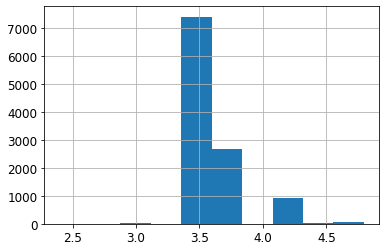

In [134]:
y_log_transform = np.log1p(y)
y_log_transform.hist()

In [135]:
# 타깃 칼럼인 count값을 log1p로 로그 변환
y_target_log = np.log1p(y)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_target_log, test_size=0.2, random_state=42)

#linear regression modeling
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

# 4. 평가 MAE와 R^2, underpredict ratio

print('y_log lr R^2: ', r2(y_test_exp, pred_exp))

print('y_log lr MAE: ', mae(y_test_exp, pred_exp))
print('y_log lr underpredict ratio: ', underpredic_ratio (y_test_exp, pred_exp))

y_log lr R^2:  0.14931804689437933
y_log lr MAE:  7.247549790840543
y_log lr underpredict ratio:  0.3618747183415953


In [136]:
# 타깃 칼럼인 count값을 log1p로 로그 변환
y_target_log = np.log1p(y)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_target_log, test_size=0.2, random_state=42)

#randomforest modeling
rf = RandomForestRegressor(n_estimators = 500, max_depth=7, random_state =0)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)


# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)


# 4. 평가 MAE와 R^2
print("y_log rf R2:", r2(y_test_exp, pred_exp))
print("y_log rf MAE:", mae(y_test_exp, pred_exp))
print('y_log rf underpredict ratio: ', underpredic_ratio (y_test_exp, pred_exp))

y_log rf R2: 0.14931804689437933
y_log rf MAE: 7.247549790840543
y_log rf underpredict ratio:  0.3618747183415953


y_label 로그화는 예측력이 더 떨어져서 drop하겠습니다.

### 교차 검증(Cross-Validation)을 사용한 평가

In [137]:
from sklearn.model_selection import cross_val_score

In [138]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [139]:
# 1. linear regressor

m_lr_scores = cross_val_score(m_lr, X_train, y_train,
                             scoring="neg_mean_absolute_error", cv=10)
lin_rmse_scores = np.sqrt(-m_lr_scores)
display_scores(lin_rmse_scores)

Scores: [4.24897430e-01 4.15487923e-01 9.21309888e+03 4.23415334e-01
 6.65432147e+03 2.30102540e+03 4.33777344e-01 4.28837281e-01
 1.54675234e+04 4.15578768e-01]
Mean: 3363.8511106974593
Standard deviation: 5104.363234780875


In [140]:
# 2. decision tree regressor
dt_scores = cross_val_score(dt, X_train, y_train,
                             scoring="neg_mean_absolute_error", cv=10)
dt_rmse_scores = np.sqrt(-dt_scores)
display_scores(dt_rmse_scores)

Scores: [0.40403408 0.39680149 0.39764571 0.40311291 0.39630845 0.40770768
 0.40630932 0.40951976 0.41727848 0.39986021]
Mean: 0.4038578084967295
Standard deviation: 0.006284463907545844


In [141]:
# 3. random forest regressor
rf_scores = cross_val_score(rf, X_train, y_train,
                             scoring="neg_mean_absolute_error", cv=10)
rf_rmse_scores = np.sqrt(-rf_scores)
display_scores(rf_rmse_scores)

Scores: [0.39422827 0.38324179 0.3848912  0.39241048 0.38317113 0.39570589
 0.39573462 0.40672315 0.40381144 0.38815475]
Mean: 0.39280727206318244
Standard deviation: 0.007762442946920458


## 6. 모델을 상세하게 조정합니다 (fine-tune your model).

### 6-1. Grid Search 

In [142]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='r2',
                           return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='r2')

In [143]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

best estimator대로 모델링해보자

In [144]:
rf = RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)


#평가
print("random forest R2:", r2(y_test, y_pred))
print("random forest MAE:", mae(y_test,y_pred))
print('random forest underpredict ratio: ', underpredic_ratio (y_test, y_pred))

random forest R2: 0.33965463730842105
random forest MAE: 0.14518094885578903
random forest underpredict ratio:  0.2789544840018026


1. 하이퍼 파라미터 : n_estimators = 500, max_depth=7, random_state =0
- random forest R2: 0.2803068703726267
- random forest MAE: 6.557196092404201
- random forest underpredict ratio:  0.27309598918431727

2. 하이퍼 파라미터: max_features=8, n_estimators=30, random_state=42
- random forest R2: 0.3569480051741485
- random forest MAE: 0.1434614930620851
- random forest underpredict ratio:  0.2771518702118071

In [145]:
#파라미터 튜닝을 거친 베스트 파라미터로 k겹 교차 검증
# 3. random forest regressor
rf_scores = cross_val_score(rf, X_train, y_train,
                             scoring="neg_mean_absolute_error", cv=10)
rf_rmse_scores = np.sqrt(-rf_scores)
display_scores(rf_rmse_scores)

Scores: [0.38785123 0.37215861 0.37171829 0.38478621 0.37813359 0.38184913
 0.39180273 0.39915705 0.3925901  0.37527077]
Mean: 0.3835317699850399
Standard deviation: 0.008854183809393762


아주 약간 평가 지표들이 좋아진 것을 확인할 수 있다.

### 6-2. Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train,y_train)

In [ ]:
best_score = []
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    best_score.append((np.sqrt(-mean_score), params))

sorted(best_score)[0]

In [ ]:
rf = RandomForestRegressor(max_features=7, n_estimators=190, random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)


#평가
print("random forest R2:", r2(y_test, y_pred))
print("random forest MAE:", mae(y_test,y_pred))
print('random forest underpredict ratio: ', underpredic_ratio (y_test, y_pred))

In [ ]:
#파라미터 튜닝을 거친 베스트 파라미터로 k겹 교차 검증
# 3. random forest regressor
rf_scores = cross_val_score(rf, X_train, y_train,
                             scoring="neg_mean_absolute_error", cv=10)
rf_rmse_scores = np.sqrt(-rf_scores)
display_scores(rf_rmse_scores)

1. 하이퍼 파라미터 : n_estimators = 500, max_depth=7, random_state =0
- random forest R2: 0.2803068703726267
- random forest MAE: 6.557196092404201
- random forest underpredict ratio:  0.27309598918431727

2. 하이퍼 파라미터: max_features=6, n_estimators=30, random_state=42
- random forest R2: 0.3569480051741485
- random forest MAE: 0.1434614930620851
- random forest underpredict ratio:  0.2771518702118071

3. 하이퍼 파라미터: (max_features=7, n_estimators=190, random_state=42)
- random forest R2: 0.3670380139205074
- random forest MAE: 0.1443872984643192
- random forest underpredict ratio:  0.2942767012167643


### under-prediction vs. over-prediction

 더 걸린 경우(under-prediction)가 반대의 경우(over-prediction)보다 두 배로 사용자의 경험에 안 좋은 영향을 준다고 알려져 있습니다.
가능한 실제 배달시간과 가까운 값을 예측하되 동시에 under-prediction을 최소화하는 것이 좋은 예측모델입니다.

손실함수에 대해서 고민해보시고 기본적인 squared loss외에 어떤 손실함수를 사용해야 under-prediction을 비교적 줄일 수 있을지 생각해보시고 구현도 해보세요.

-> 이 부분은 어떻게 처리할 수 있을까?

RandomizedSearchCV document에 의하면, 평가모델을 측정하는 하이퍼 파라미터를 변경할 수 있다. 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

우리가 사용한 MAE 나 MSE의 경우 절대값이거나 squared 값을 취하기 때문에, 예측값이 실제 값보다 큰 지, 작은 지에 따른 차이는 반영하지 않고 있다.

더 걸린 경우(under-prediction)가 반대의 경우(over-prediction)보다 두 배로 사용자의 경험에 안 좋은 영향을 준다는 것을 반영하기 위해서
사용자가 정의한 score를 만들고, 이를 RandomizedSearchCV의 하이퍼 parameter scoring에 넣어서, 이를 최소화 하는 hyper parameter를 찾아 tuning 하려고 한다.
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [ ]:
import numpy as np
def my_custom_loss_func(y_test, y_pred):
    y_test = pd.DataFrame(y_test)
    y_pred = pd.DataFrame(y_pred)
    diff = 0
    for i in range(len(y_test)):
        if (y_test.iloc[i][0] - y_pred[i]) >= 0:
            diff += 2*(y_test.iloc[i][0] - y_pred[i])
        else:
            diff += np.abs(y_test.iloc[i][0] - y_pred[i])
    return diff

In [ ]:
from sklearn.metrics import make_scorer
my_scorer = make_scorer(my_custom_loss_func, greater_is_better=False)

In [ ]:
type(my_scorer)

In [ ]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring=my_scorer, random_state=42)

In [ ]:
rnd_search.fit(X_train,y_train)

In [ ]:
def best_parameter(cv_result):
    best_score = []
    cvres = cv_result
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        best_score.append((np.sqrt(-mean_score), params))

    return sorted(best_score)[0]

In [ ]:
best_parameter(rnd_search.cv_results_)

In [ ]:
rf = RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)


#평가
print("random forest R2:", r2(y_test, y_pred))
print("random forest MAE:", mae(y_test,y_pred))
print('random forest underpredict ratio: ', underpredic_ratio (y_test, y_pred))

scoring 파라미터를 정의해서 해결하는 방법은 잘 구현해내지 못했습니다.
현재까지 시도해 본 방법 중 MAE가 가장 낮은 방법은
랜덤포레스트 regressor로,
하이퍼 파라미터: max_features=6, n_estimators=30,\ random_state=42 일 때,\

random forest R2: 0.3569480051741485\
random forest MAE: 0.1434614930620851\
random forest underpredict ratio: 0.2771518702118071\

결과값을 얻었습니다.